# General EDA of SHIF Data

@roman

4 June, 2024

---
# Settings

In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Settings
# show 100 columns in pandas
pd.set_option('display.max_columns', 500)

---
# Data

In [11]:
# read parquet
df_properties = pd.read_parquet("../../data/raw/appraisals.parquet")
df_properties

,half_bathrooms,full_bathrooms,property_class_more_common_in_area,neighborhood,constructor,zip_code,property_account_id,special_common_installations_description,special_private_installations_description,complementary_common_works_description,age_in_months,parking_lots,valuation_date,common_areas_completion_percentage,private_works_completion_percentage,potable_water_service_id,lighting_service_id,sidewalk_id,project_quality_id,property_class_id,conservation_status_id,controller_id,elevator_service_id,state_id,equipment_id,curb_id,infrastructure_service_id,road_materials_id,municipality_id,grantor_id,urban_proximity_id,water_collection_service_id,electrical_supply_service_id,telephone_service_supply_id,property_type_id,public_transportation_service_id,valuation_unit_id,valuation_professional_id,latitude,longitude,level,total_levels,purpose_of_appraisal,bedrooms,accessory_area,built_area,saleable_area,land_area,distance_to_public_transportation,rentable_units,rentable_units_subject_property,current_use,market_price,price,built_price,land_price,access_routes,remaining_useful_life,observation_id,property_id
0,1,2,4,VISTA HERMOSA HUITEPEC,NO APLICA,29263,<NA>,<NA>,<NA>,<NA>,36,1,2022-06-14,NaN,100.0,NaN,NaN,NaN,NaN,4,4,301ef216-0137-4989-bdd0-32bf1adf1e9b,0.0,7,1,NaN,1,2,78,6f8c15c7-2914-40bb-87ff-59076af288c9,3,NaN,NaN,NaN,2,NaN,35a7806a-f686-4159-be91-16997e86d271,87aa63b6-9005-4ed3-ba44-fcd75453a9e9,16.737283,-92.672659,3,3,S/D,3,10.750000,216.809998,227.559998,302.700012,NaN,1.0,NaN,<NA>,3716737.0,3717000.0,2532281.13,1.033418e+06,<NA>,67,02086af7-ffbb-4e67-b857-27e6cef09b0d,2b225ce9-7742-512e-aac5-846811f1a6a1
1,1,2,4,MAYA,NO APLICA,97134,<NA>,<NA>,<NA>,<NA>,204,1,2022-11-15,NaN,100.0,NaN,NaN,NaN,NaN,4,4,717559f7-a918-48f7-9356-c79c582d95b3,0.0,31,2,NaN,1,2,50,9a2781c9-b312-453c-86d1-a6e90584a083,2,NaN,NaN,NaN,2,NaN,b3bf58b2-40cc-4edd-bcf1-e4a0b2798533,02af4710-0922-4bed-9763-045ba14e0283,21.014297,-89.575189,3,2,S/D,3,13.380000,141.550003,154.929993,198.000000,NaN,1.0,NaN,<NA>,2348706.0,2349000.0,1111845.21,9.848520e+05,<NA>,53,43c375b2-75fd-4fcc-b311-55b396e7cbbf,b7f8c282-b67e-5d63-920d-c603b4e2eb52
2,0,1,3,KANASIN,NO APLICA,97370,<NA>,<NA>,<NA>,<NA>,60,1,2022-06-22,NaN,100.0,NaN,NaN,NaN,NaN,3,5,8378ef1c-2fdf-4b2a-be29-0e62eb19d753,2.0,31,2,NaN,1,3,41,98013144-6a9f-4e08-9255-cb54568d2f5a,2,NaN,NaN,NaN,2,NaN,4e63856b-ae68-4653-bcaa-86a51d5d7053,a7f6ef17-0933-4138-9aa9-99529929184d,20.928954,-89.546637,3,1,S/D,2,1.120000,44.349998,45.470001,144.800003,NaN,1.0,NaN,<NA>,446378.0,450000.0,279611.30,1.026632e+05,<NA>,55,e57ad294-8db8-4ca1-b01f-7ccbc5981922,552216f4-540b-500d-a4e7-6be55b2b6703
3,0,1,3,MULCHECHEN,NO APLICA,97370,<NA>,<NA>,<NA>,<NA>,192,1,2022-11-01,NaN,100.0,NaN,NaN,NaN,NaN,3,4,8378ef1c-2fdf-4b2a-be29-0e62eb19d753,2.0,31,2,NaN,1,3,41,98013144-6a9f-4e08-9255-cb54568d2f5a,3,NaN,NaN,NaN,2,NaN,4e63856b-ae68-4653-bcaa-86a51d5d7053,923b9bb1-9ab4-4984-93f1-c873b3c26977,20.916897,-89.580945,3,1,S/D,2,2.160000,52.049999,54.209999,133.750000,NaN,1.0,NaN,<NA>,424468.0,424000.0,290492.55,9.683500e+04,<NA>,44,f95c14fe-9acc-4b5c-872b-bd15d412a65d,7215360d-9d5e-538a-971f-15fbef435f54
4,0,3,4,POBLACION MOTUL,NO APLICA,97430,<NA>,<NA>,<NA>,<NA>,116,0,2022-11-01,NaN,100.0,NaN,NaN,NaN,NaN,4,4,1f637d21-f0cb-43be-b989-5923e4c01d94,0.0,31,1,NaN,1,2,52,bc0e00ba-8c35-465f-bbcd-61cedf83d6d8,1,NaN,NaN,NaN,2,NaN,90a0a9f7-fab3-4170-b3da-db49e122e41b,f6e764a4-141c-4b02-b902-4a158ec58c58,21.096391,-89.285366,3,2,S/D,2,19.049999,229.929993,248.979996,844.520020,NaN,1.0,NaN,<NA>,2779000.0,2779000.0,1767043.79,6.418352e+05,<NA>,39,74af41d9-b7b3-464d-9302-7fd1f231ee26,5b18adfe-606c-590f-bc76-d3eabfd0ba41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339239,1,3,5,FRACC RES CAMPESTRE CONDADO SAYAVEDRA,NO APLICA,52938,<NA>,3,<NA>,3,0,4,2019-06-05,NaN,NaN,Na

In [12]:
# see columns
df_properties.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339244 entries, 0 to 2339243
Data columns (total 60 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   half_bathrooms                             uint8         
 1   full_bathrooms                             uint8         
 2   property_class_more_common_in_area         string        
 3   neighborhood                               string        
 4   constructor                                string        
 5   zip_code                                   uint32        
 6   property_account_id                        string        
 7   special_common_installations_description   string        
 8   special_private_installations_description  string        
 9   complementary_common_works_description     string        
 10  age_in_months                              uint8         
 11  parking_lots                               uint8         
 12  

In [13]:
# see all columns that have 'price'
df_properties.filter(like='price')

,market_price,price,built_price,land_price
0,3716737.0,3717000.0,2532281.13,1.033418e+06
1,2348706.0,2349000.0,1111845.21,9.848520e+05
2,446378.0,450000.0,279611.30,1.026632e+05
3,424468.0,424000.0,290492.55,9.683500e+04
4,2779000.0,2779000.0,1767043.79,6.418352e+05
...,...,...,...,...
2339239,11649451.0,11649000.0,32301.47,5.319818e+06
2339240,3323565.0,3324000.0,1570886.00,1.131900e+06
2339241,5311032.0,5311000.0,3484436.50,1.583010e+06
2339242,3175521.0,3176000.0,1819890.00,9.216000e+05


In [14]:
# see all columns that have 'superficie'
df_properties.filter(like='area')

,property_class_more_common_in_area,common_areas_completion_percentage,accessory_area,built_area,saleable_area,land_area
0,4,NaN,10.750000,216.809998,227.559998,302.700012
1,4,NaN,13.380000,141.550003,154.929993,198.000000
2,3,NaN,1.120000,44.349998,45.470001,144.800003
3,3,NaN,2.160000,52.049999,54.209999,133.750000
4,4,NaN,19.049999,229.929993,248.979996,844.520020
...,...,...,...,...,...,...
2339239,5,NaN,127.339996,444.739990,444.739990,967.969971
2339240,5,NaN,33.730000,212.460007,246.190002,231.000000
2339241,5,NaN,87.980003,263.739990,351.720001,479.700012
2339242,5,NaN,44.099998,180.160004,224.259995,144.000000


---
# Time Distribution

In [15]:
# describe
df_properties['valuation_date'].describe()

count                          2339244
mean     2021-06-22 21:16:17.134150656
min                2019-01-01 00:00:00
25%                2020-03-11 00:00:00
50%                2021-05-21 00:00:00
75%                2022-10-19 00:00:00
max                2023-12-31 00:00:00
Name: valuation_date, dtype: object

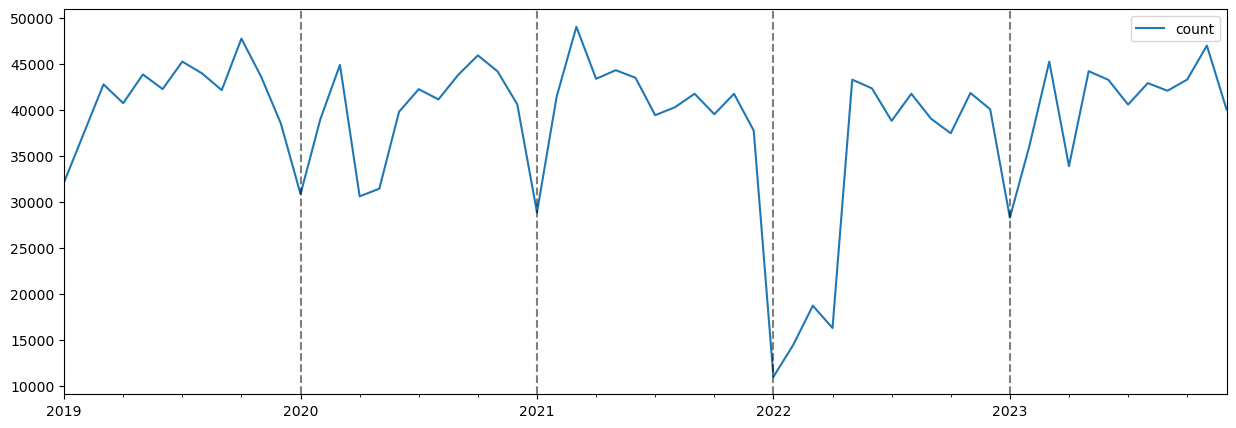

In [16]:
# time series of counts by each month and year
ts_counts = (
    df_properties
    ['valuation_date'].dt.to_period('M')
    .value_counts()
    .sort_index()
    .to_frame()
    # add missing months
    .reindex(pd.period_range(
        start=df_properties['valuation_date'].min().to_period('M'),
        end=df_properties['valuation_date'].max().to_period('M'),
        freq='M'
        ))
    .fillna(0)
    )

# plot time series
ts_counts.plot(figsize=(15, 5))

# add line each beginning of year
for year in range(df_properties['valuation_date'].dt.year.min(), df_properties['valuation_date'].dt.year.max() + 1):
    plt.axvline(x=f'{year}-01', color='k', linestyle='--', alpha=0.5)

In [75]:
# count
# time series of counts by each month and year
ts_counts = (
    df_properties
    .assign(
        valuation_date=lambda x: x['valuation_date'].dt.to_period('M')
        )
    .groupby(['state_id', 'valuation_date'])
    .size()
    # add missing months
    .reindex(pd.MultiIndex.from_product(
        [
            df_properties['state_id'].unique(),
            pd.period_range(
                start=df_properties['valuation_date'].min().to_period('M'),
                end=df_properties['valuation_date'].max().to_period('M'),
                freq='M'
             )
        ],
        names=['state_id', 'valuation_date']
        ))
    # fill missing values with 0
    .fillna(0)
    # to frame
    .to_frame('count')
    # reset index
    .reset_index()
    # assign
    .assign(
        state_id=lambda x: x['state_id'].astype('category')
    )
    # date as index
    .set_index('valuation_date')
)

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_87571/3358073076.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ts_counts.groupby('state_id')['count'].plot(ax=ax, legend=True)


state_id
1     Axes(0.125,0.11;0.775x0.77)
2     Axes(0.125,0.11;0.775x0.77)
3     Axes(0.125,0.11;0.775x0.77)
4     Axes(0.125,0.11;0.775x0.77)
5     Axes(0.125,0.11;0.775x0.77)
6     Axes(0.125,0.11;0.775x0.77)
7     Axes(0.125,0.11;0.775x0.77)
8     Axes(0.125,0.11;0.775x0.77)
9     Axes(0.125,0.11;0.775x0.77)
10    Axes(0.125,0.11;0.775x0.77)
11    Axes(0.125,0.11;0.775x0.77)
12    Axes(0.125,0.11;0.775x0.77)
13    Axes(0.125,0.11;0.775x0.77)
14    Axes(0.125,0.11;0.775x0.77)
15    Axes(0.125,0.11;0.775x0.77)
16    Axes(0.125,0.11;0.775x0.77)
17    Axes(0.125,0.11;0.775x0.77)
18    Axes(0.125,0.11;0.775x0.77)
19    Axes(0.125,0.11;0.775x0.77)
20    Axes(0.125,0.11;0.775x0.77)
21    Axes(0.125,0.11;0.775x0.77)
22    Axes(0.125,0.11;0.775x0.77)
23    Axes(0.125,0.11;0.775x0.77)
24    Axes(0.125,0.11;0.775x0.77)
25    Axes(0.125,0.11;0.775x0.77)
26    Axes(0.125,0.11;0.775x0.77)
27    Axes(0.125,0.11;0.775x0.77)
28    Axes(0.125,0.11;0.775x0.77)
29    Axes(0.125,0.11;0.775x0.77)
30   

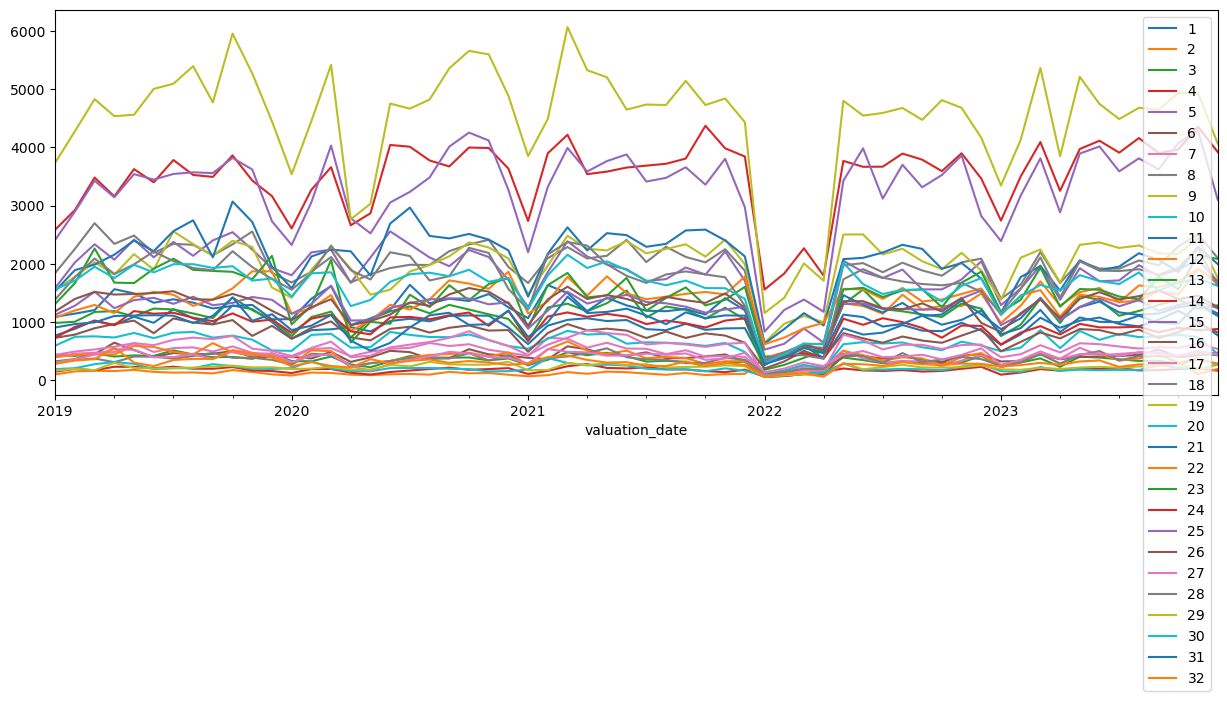

In [77]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 5))
ts_counts.groupby('state_id')['count'].plot(ax=ax, legend=True)

---
# Geospatial analysis

In [78]:
# look nan state_id
df_properties['state_id'].isna().sum()

0

<Axes: xlabel='state_id'>

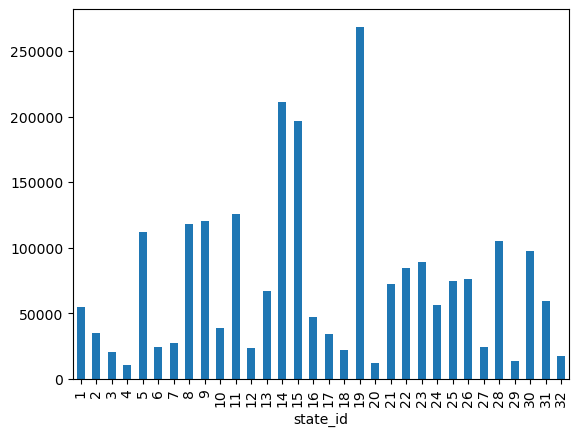

In [79]:
# cout by ID_ENTIDAD_F
df_properties['state_id'].value_counts().sort_index().plot(kind='bar')

In [80]:
# look nan latitudee & longitudee
df_properties[['latitudee', 'longitudee']].isna().sum()

latitude     0
longitude    0
dtype: int64

<Axes: >

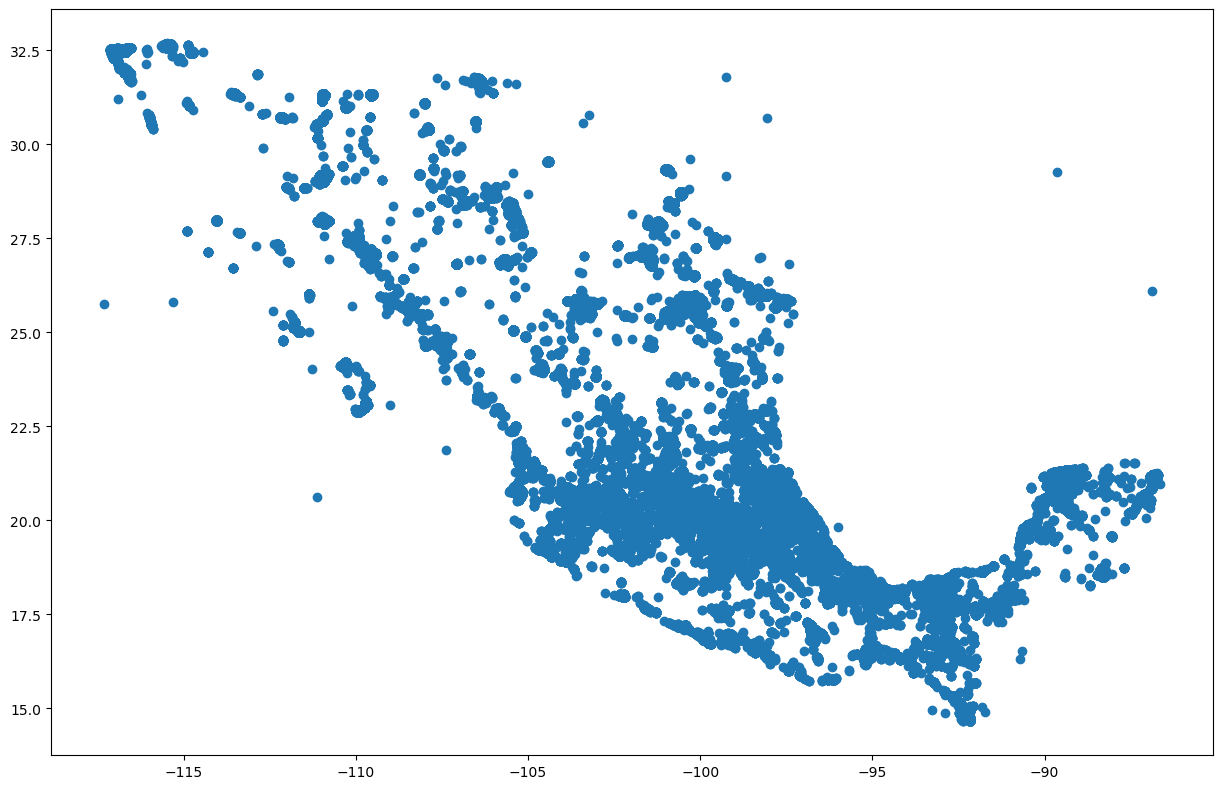

In [81]:
# plot points
gdf_properties = gpd.GeoDataFrame(
    df_properties.loc[:, ['latitudee', 'longitudee']],
    geometry=gpd.points_from_xy(df_properties['longitudee'], df_properties['latitudee']),
    crs='EPSG:4326'
    )

# plot
gdf_properties.plot(figsize=(15, 15))

---
# Absolute Prices

In [82]:
# describe
df_properties.filter(like='price').describe()

,market_price,price,built_price,land_price
count,2.339244e+06,2.339244e+06,2.339244e+06,2.339244e+06
mean,1.414575e+06,1.412608e+06,6.903556e+05,4.586258e+05
std,2.156791e+06,2.149334e+06,8.688823e+05,2.112462e+06
min,0.000000e+00,2.000000e+05,0.000000e+00,5.400000e-03
25%,5.282280e+05,5.280000e+05,2.929920e+05,1.416040e+05
50%,7.801960e+05,7.800000e+05,4.251780e+05,2.198823e+05
75%,1.511000e+06,1.510000e+06,7.961572e+05,4.059950e+05
max,1.018017e+08,8.958900e+07,9.875273e+07,4.890980e+08


## Final Price

<Axes: xlabel='price', ylabel='Density'>

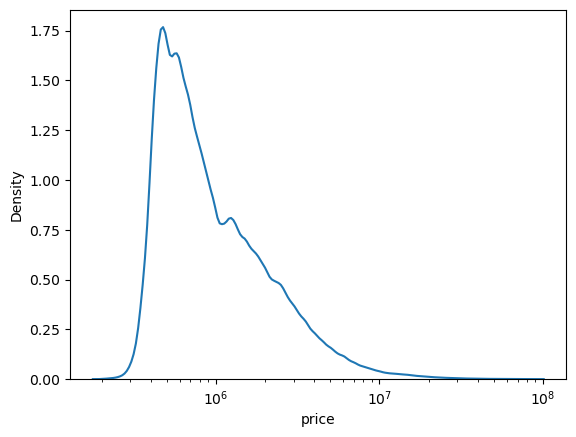

In [83]:
# plot
sns.kdeplot(df_properties, x='price', log_scale=True)

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


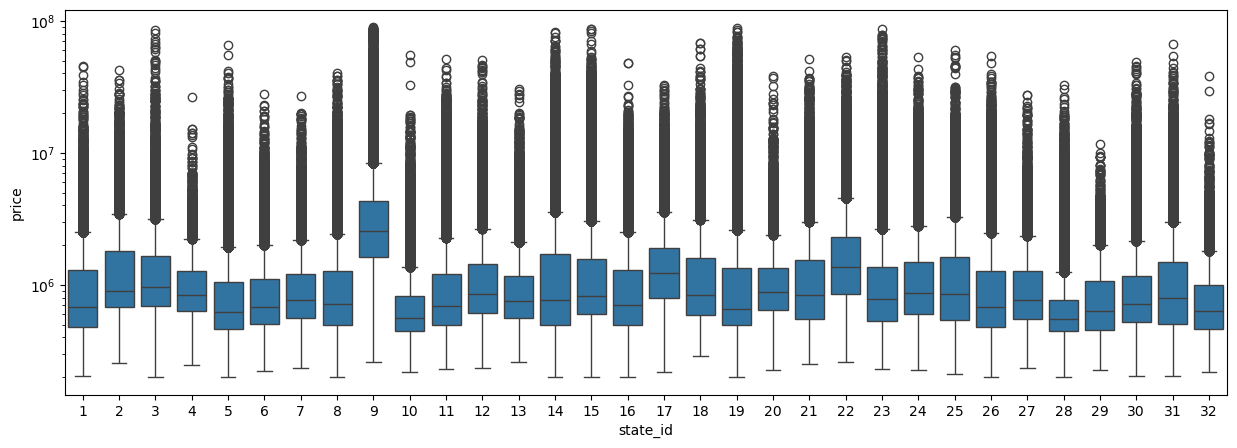

In [84]:
# create boxplot of price and state_id
plt.figure(figsize=(15, 5))

sns.boxplot(
    x='state_id',
    y='price',
    data=df_properties
    )

# in log scale
plt.yscale('log')


## Valor Físico Construcción

<Axes: xlabel='built_price', ylabel='Density'>

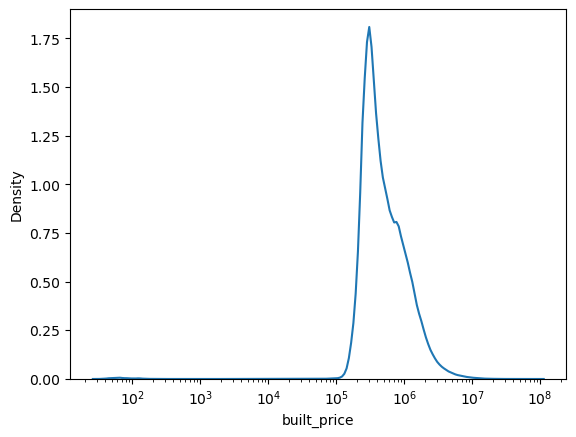

In [85]:
# plot
sns.kdeplot(df_properties.query("built_price > 0"), x='built_price', log_scale=True)

In [86]:
# look how many properties have built_price == 0
print(df_properties['built_price'].le(0).sum())
print(df_properties['built_price'].le(0).mean())

23483
0.010038713362094762


## Valor Mercado

<Axes: xlabel='market_price', ylabel='Density'>

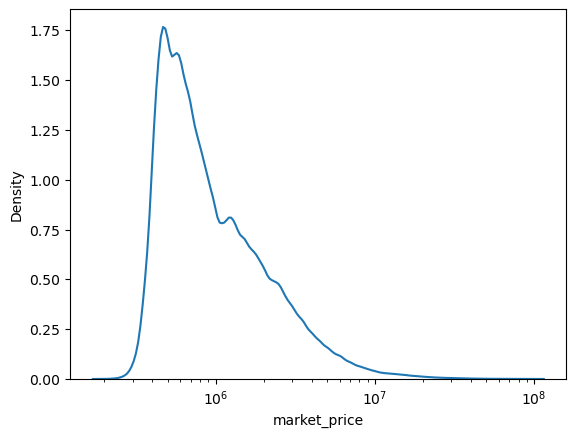

In [87]:
# plot 
sns.kdeplot(df_properties.query("market_price > 0"), x='market_price', log_scale=True)

In [88]:
# look how many properties have market_price == 0
print(df_properties['market_price'].le(0).sum())
print(df_properties['market_price'].le(0).mean())

27
1.1542190553871251e-05


## Valor Fisico Terreno

<Axes: xlabel='land_price', ylabel='Density'>

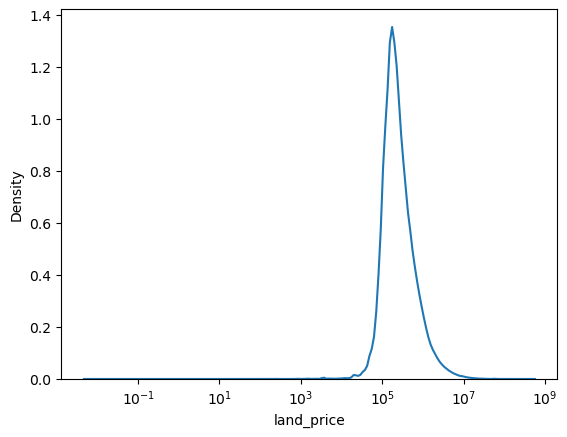

In [89]:
# plot 
sns.kdeplot(df_properties.query("land_price > 0"), x='land_price', log_scale=True)

In [90]:
# look how many properties have land_price == 0
print(df_properties['land_price'].le(0).sum())
print(df_properties['land_price'].le(0).mean())

0
0.0


## Price per m2

In [91]:
# price per sqm
df_properties['price_per_sqm'] = df_properties['price'] / df_properties['saleable_area']

In [92]:
# describe
df_properties['price_per_sqm'].describe()

count    2.339244e+06
mean     1.428925e+04
std      9.092709e+03
min      4.000000e+03
25%      9.562446e+03
50%      1.172990e+04
75%      1.536101e+04
max      2.673253e+05
Name: price_per_sqm, dtype: float64

<Axes: xlabel='price_per_sqm', ylabel='Density'>

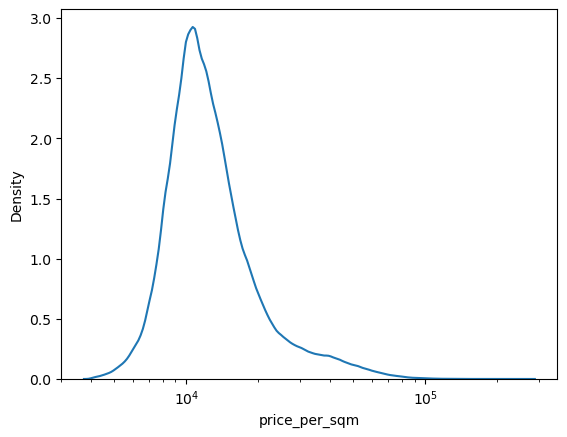

In [94]:
# plot
sns.kdeplot(df_properties, x='price_per_sqm', log_scale=True)

---
# Age

In [95]:
# describe
df_properties['age_in_months'].describe()

count    2.339244e+06
mean     5.165305e+01
std      7.277167e+01
min      0.000000e+00
25%      0.000000e+00
50%      7.000000e+00
75%      9.600000e+01
max      2.550000e+02
Name: age_in_months, dtype: float64

<Axes: xlabel='age_in_months', ylabel='Count'>

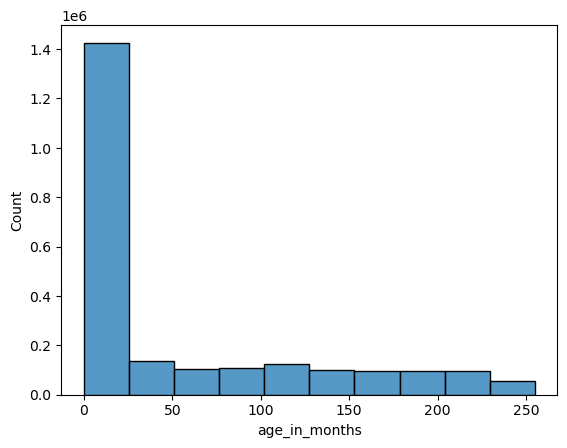

In [98]:
# plot
sns.histplot(df_properties, x='age_in_months', bins=10)

In [99]:
# how many with less than 0 years
print(df_properties['age_in_months'].le(0).sum())
print(df_properties['age_in_months'].le(0).mean())

1105121
0.47242656174387965


---
# ID Type of Property

In [100]:
# read txt files
def read_and_convert_to_dataframe(file_path):
    """
    Reads a text file and converts it into a pandas DataFrame with 'category' and 'description' columns.

    Parameters:
        file_path (str): The path to the text file.

    Returns:
        pd.DataFrame: A DataFrame with the formatted content.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        data = []
        for line in lines:
            line = line.strip()  # Remove leading/trailing whitespace
            if line and not line.startswith('#'):  # Skip empty lines and comments
                parts = line.split(' ', 1)  # Split on the first space
                if len(parts) == 2:
                    category, description = parts
                    if category.isdigit():  # Ensure category is a number
                        data.append((int(category), description.strip()))

        # Create DataFrame
        df = pd.DataFrame(data, columns=['category', 'description'])

        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error


In [101]:
# read txt files
table_property_type = read_and_convert_to_dataframe("../../data/catalogues/avaluos_catalogue/CAT_TIPO_INMUEBLE.txt")
table_property_type

,category,description
0,1,TERRENO
1,2,CASA HABITACIÓN
2,3,CASA EN CONDOMINIO
3,4,DEPARTAMENTO EN CONDOMINIO
4,5,OTRO
5,6,VIVIENDA MULTIPLE


In [103]:
# count
(
    df_properties['property_type_id']
    .value_counts()
    .reset_index()
    .merge(
        table_property_type,
        left_on='property_type_id',
        right_on='category',
        how='left'
    )
    .loc[:, ['description', 'count']]
    .assign(
        percentage=lambda x: x['count'] / x['count'].sum()
    )
)

,description,count,percentage
0,CASA HABITACIÓN,1160832,0.496242
1,CASA EN CONDOMINIO,597118,0.255261
2,DEPARTAMENTO EN CONDOMINIO,540330,0.230985
3,OTRO,40964,0.017512


In [104]:
# see nulls
df_properties['property_type_id'].isna().sum()

0

---
# ID Property class

In [107]:
# read txt files
table_property_class = read_and_convert_to_dataframe("../../data/catalogues/avaluos_catalogue/CVE_CLASE_INMUEBLE, CVE_CLASE_GENERAL_INMUEBLES_ZONA Cat.ClasesConstruccion.txt")
table_property_class

,category,description
0,0,NO APLICA
1,1,Mínima
2,2,Económica
3,3,Interés Social
4,4,Media
5,5,Semilujo
6,6,Residencial
7,7,Residencial Plus
8,8,Única


In [108]:
# count
(
    df_properties['property_class_id']
    .value_counts()
    .reset_index()
    .sort_values('property_class_id', ignore_index=True)
    .merge(
        table_property_class,
        left_on='property_class_id',
        right_on='category',
        how='left'
    )
    .loc[:, ['description', 'category', 'count']]
    .assign(
        percentage=lambda x: x['count'] / x['count'].sum()
    )
    .sort_values('percentage', ascending=False, ignore_index=True)
)

,description,category,count,percentage
0,Interés Social,3,1306412,0.558476
1,Media,4,835212,0.357044
2,Semilujo,5,112339,0.048024
3,Económica,2,59499,0.025435
4,Residencial,6,22474,0.009607
5,Residencial Plus,7,3308,0.001414


---
# Conservation Status

In [109]:
# look values
df_properties['conservation_status_id'].value_counts(dropna=False, normalize=True)

conservation_status_id
6    0.481361
4    0.454310
5    0.045048
7    0.017200
3    0.002081
Name: proportion, dtype: float64

---
# Lifetime

In [110]:
# remaining_useful_life
df_properties['remaining_useful_life'].describe()

count    2.339244e+06
mean     5.847166e+01
std      1.112246e+01
min     -9.000000e+00
25%      5.200000e+01
50%      6.000000e+01
75%      6.900000e+01
max      8.000000e+01
Name: remaining_useful_life, dtype: float64

In [111]:
# count values less than 0
print(df_properties['remaining_useful_life'].lt(0).sum())
print(df_properties['remaining_useful_life'].lt(0).mean())

7
2.99241977322588e-06


<Axes: xlabel='remaining_useful_life', ylabel='Count'>

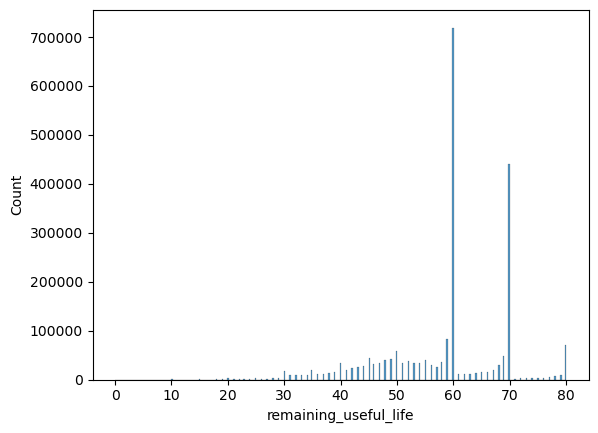

In [112]:
# plot
sns.histplot(df_properties.query("remaining_useful_life >= 0"), x='remaining_useful_life')

---
# Appraiser ID

In [113]:
# counts
df_properties['valuation_professional_id'].value_counts(dropna=False, normalize=True)

valuation_professional_id
c3d89fd6-4239-430f-aaf4-11977bb41572    0.008515
aae8fc58-767c-4090-bff4-2e4f84de0044    0.007429
685eb233-ffab-414d-a88a-4bc42419b9eb    0.007333
e9c82f41-f699-4778-bc7e-a6ae0fc93a38    0.007092
726f1466-df5d-4563-813d-4cb961aec9b3    0.007042
                                          ...   
0bbebb92-fa0d-4e22-bd7d-c2a7431c9944         0.0
740a0b30-5b97-44e6-aaa8-aa92af3f26ce         0.0
b8025a93-ba6e-416b-90a1-781e384e7407         0.0
7aabc72c-c7bc-4fa3-8625-78914f727cf0         0.0
bb870006-46b2-42ba-91e3-f16dc4cccb0e         0.0
Name: proportion, Length: 2526, dtype: Float64

In [114]:
# counts
df_properties['valuation_professional_id'].value_counts(dropna=False, normalize=False)

valuation_professional_id
c3d89fd6-4239-430f-aaf4-11977bb41572    19918
aae8fc58-767c-4090-bff4-2e4f84de0044    17378
685eb233-ffab-414d-a88a-4bc42419b9eb    17153
e9c82f41-f699-4778-bc7e-a6ae0fc93a38    16590
726f1466-df5d-4563-813d-4cb961aec9b3    16473
                                        ...  
0bbebb92-fa0d-4e22-bd7d-c2a7431c9944        1
740a0b30-5b97-44e6-aaa8-aa92af3f26ce        1
b8025a93-ba6e-416b-90a1-781e384e7407        1
7aabc72c-c7bc-4fa3-8625-78914f727cf0        1
bb870006-46b2-42ba-91e3-f16dc4cccb0e        1
Name: count, Length: 2526, dtype: Int64

In [115]:
# see how many clvae_valuador are only 1
print(df_properties['valuation_professional_id'].value_counts(dropna=False).eq(1).sum())
print(df_properties['valuation_professional_id'].value_counts(dropna=False).eq(1).mean())

82
0.03246239113222486


In [116]:
# look for nulls
df_properties['valuation_professional_id'].isna().sum()

0

---
# Controler ID

In [117]:
# counts
df_properties['controller_id'].value_counts(dropna=False, normalize=True)

controller_id
a332a3ed-2b26-416f-8315-75aa9cd6913d    0.021277
34e46c5f-11c3-4c22-afc4-ead80d8e108b    0.019234
36bab266-e235-468c-8389-ea671db7210e    0.019189
71bc2f20-547c-4322-a4f5-e1ad158186e0    0.017141
e93a5424-1395-46f9-b5a0-beb13168a63a    0.016593
                                          ...   
33ed246e-af8e-4716-a40a-8d8dc1243263         0.0
dee65255-8699-4e14-9efe-e17adf9101e3         0.0
86a40153-729b-4d00-a8c0-3b7879848f46         0.0
603aff0a-f673-4cb9-b9f4-76fe6c795f67         0.0
3ec94307-3843-4525-a1cb-6af26a5574e0         0.0
Name: proportion, Length: 1063, dtype: Float64

In [118]:
# counts
df_properties['controller_id'].value_counts(dropna=False, normalize=False)

controller_id
a332a3ed-2b26-416f-8315-75aa9cd6913d    49772
34e46c5f-11c3-4c22-afc4-ead80d8e108b    44992
36bab266-e235-468c-8389-ea671db7210e    44888
71bc2f20-547c-4322-a4f5-e1ad158186e0    40097
e93a5424-1395-46f9-b5a0-beb13168a63a    38814
                                        ...  
33ed246e-af8e-4716-a40a-8d8dc1243263        1
dee65255-8699-4e14-9efe-e17adf9101e3        1
86a40153-729b-4d00-a8c0-3b7879848f46        1
603aff0a-f673-4cb9-b9f4-76fe6c795f67        1
3ec94307-3843-4525-a1cb-6af26a5574e0        1
Name: count, Length: 1063, dtype: Int64

In [119]:
# see how many clvae_valuador are only 1
print(df_properties['controller_id'].value_counts(dropna=False).eq(1).sum())
print(df_properties['controller_id'].value_counts(dropna=False).eq(1).mean())

29
0.027281279397930385


In [120]:
# look for nulls
df_properties['controller_id'].isna().sum()

0

---
# General Amenities

## Bathrooms

In [121]:
# counts
df_properties['full_bathrooms'].value_counts(dropna=False, normalize=True)

full_bathrooms
1    0.677531
2    0.229075
3    0.064363
4    0.020983
5    0.006160
6    0.001450
7    0.000354
8    0.000085
Name: proportion, dtype: float64

In [122]:
# how many are less equal to 0
print(df_properties['full_bathrooms'].le(0).sum())
print(df_properties['full_bathrooms'].le(0).mean())

0
0.0


In [123]:
# how many bathrooms are greater than 5
print(df_properties['full_bathrooms'].gt(5).sum())
print(df_properties['full_bathrooms'].gt(5).mean())

4417
0.0018882168769055302


In [125]:
# medio_bano
df_properties['half_bathrooms'].value_counts(dropna=False, normalize=True)

half_bathrooms
0    0.692012
1    0.295044
2    0.011521
3    0.001166
4    0.000199
5    0.000045
6    0.000012
Name: proportion, dtype: float64

In [126]:
# how many are less equal to 0
print(df_properties['half_bathrooms'].le(0).sum())
print(df_properties['half_bathrooms'].le(0).mean())

1618784
0.6920116071688118


In [127]:
# how many half baths are greater than 5
print(df_properties['half_bathrooms'].gt(5).sum())
print(df_properties['half_bathrooms'].gt(5).mean())

29
1.2397167631935788e-05


## Bedrooms

In [128]:
# bedrooms
df_properties['bedrooms'].value_counts(dropna=False, normalize=True)

bedrooms
2    0.596056
3    0.300579
1    0.061395
4    0.034605
5    0.006002
6    0.001364
Name: proportion, dtype: float64

In [130]:
# bedrooms
df_properties['bedrooms'].value_counts(dropna=False, normalize=False)

bedrooms
2    1394321
3     703127
1     143617
4      80949
5      14039
6       3191
Name: count, dtype: int64

In [129]:
# bedrooms unique values sort
df_properties['bedrooms'].sort_values().unique()

array([1, 2, 3, 4, 5, 6], dtype=uint8)

## Parking Lots

In [131]:
# counts
df_properties['parking_lots'].value_counts(dropna=False, normalize=True)

parking_lots
1    0.663820
2    0.192071
0    0.126563
3    0.011260
4    0.004690
6    0.000723
5    0.000662
8    0.000131
7    0.000081
Name: proportion, dtype: float64

In [132]:
# count less than 3
print(df_properties['parking_lots'].lt(3).sum())
print(df_properties['parking_lots'].lt(3).mean())

2298200
0.9824541604039596


---
# Surface

## Terrain

In [133]:
# describe
df_properties['land_area'].describe()

count    2.339244e+06
mean     1.154124e+02
std      1.362616e+02
min      1.000000e-02
25%      6.190375e+01
50%      9.189000e+01
75%      1.259400e+02
max      9.986000e+03
Name: land_area, dtype: float64

In [134]:
# count terrain surface less eq 0
print(df_properties['land_area'].le(0).sum())
print(df_properties['land_area'].le(0).mean())

0
0.0


In [135]:
# count terrain greater than 1000
print(df_properties['land_area'].gt(1000).sum())
print(df_properties['land_area'].gt(1000).mean())

6260
0.002676078254342001


<Axes: xlabel='land_area', ylabel='Count'>

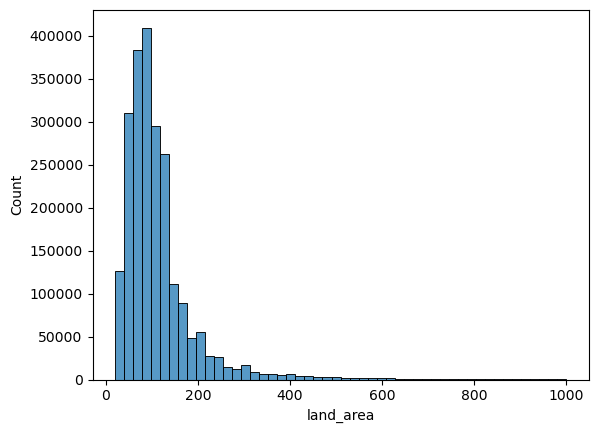

In [136]:
# distribution
sns.histplot(df_properties.query("land_area.between(20, 1_000)"), x='land_area', bins=50)

## Built Surface

In [137]:
# describe
df_properties['built_area'].describe()

count    2.339244e+06
mean     8.445940e+01
std      6.042695e+01
min      0.000000e+00
25%      4.900000e+01
50%      6.400000e+01
75%      9.835000e+01
max      1.620000e+03
Name: built_area, dtype: float64

In [138]:
# count terrain surface less eq 0
print(df_properties['built_area'].le(0).sum())
print(df_properties['built_area'].le(0).mean())

1
4.2748853903226853e-07


In [139]:
# count terrain greater than 1000
print(df_properties['built_area'].gt(1000).sum())
print(df_properties['built_area'].gt(1000).mean())

197
8.42152421893569e-05


<Axes: xlabel='built_area', ylabel='Count'>

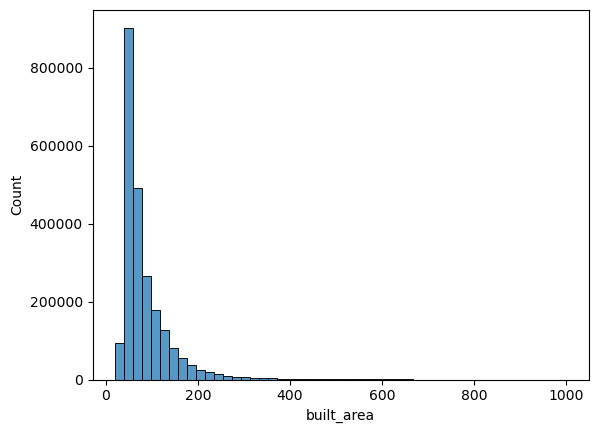

In [140]:
# distribution
sns.histplot(df_properties.query("built_area.between(20, 1_000)"), x='built_area', bins=50)

## Access Surface

In [141]:
# nulls
print(df_properties['accessory_area'].isna().sum())
print(df_properties['accessory_area'].isna().mean())

0
0.0


In [143]:
# describe
df_properties['accessory_area'].describe()

count    2.339244e+06
mean     5.484581e+00
std      2.368041e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.840000e+00
max      8.198550e+03
Name: accessory_area, dtype: float64

In [144]:
# count terrain surface less eq 0
print(df_properties['accessory_area'].le(0).sum())
print(df_properties['accessory_area'].le(0).mean())

1715648
0.7334198570136334


In [145]:
# count terrain greater than 1000
print(df_properties['accessory_area'].gt(1000).sum())
print(df_properties['accessory_area'].gt(1000).mean())

50
2.1374426951613426e-05


<Axes: xlabel='accessory_area', ylabel='Count'>

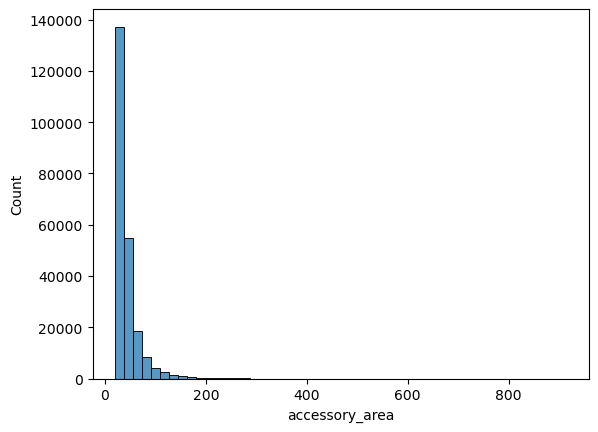

In [146]:
# distribution
sns.histplot(df_properties.query("accessory_area.between(20, 1_000)"), x='accessory_area', bins=50)

## Selling Area

In [147]:
# nans
print(df_properties['saleable_area'].isna().mean())
print(df_properties['saleable_area'].isna().mean())

0.0
0.0


In [148]:
# describe
df_properties['saleable_area'].describe()

count    2.339244e+06
mean     8.961888e+01
std      6.949136e+01
min      3.000000e+01
25%      4.951000e+01
50%      6.504000e+01
75%      1.033400e+02
max      1.973260e+03
Name: saleable_area, dtype: float64

In [149]:
# count terrain surface less eq 0
print(df_properties['saleable_area'].le(0).sum())
print(df_properties['saleable_area'].le(0).mean())

0
0.0


In [150]:
# count terrain surface less eq 20
print(df_properties['saleable_area'].le(30).sum())
print(df_properties['saleable_area'].le(30).mean())

121
5.1726113222904494e-05


In [151]:
# count terrain greater than 1000
print(df_properties['saleable_area'].gt(1000).sum())
print(df_properties['saleable_area'].gt(1000).mean())

404
0.00017270536976903648


<Axes: xlabel='saleable_area', ylabel='Count'>

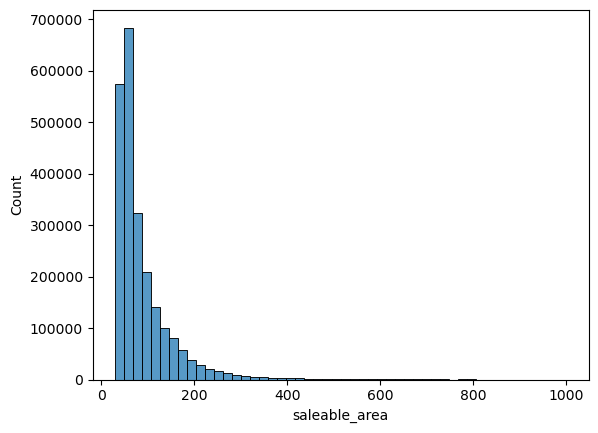

In [152]:
# distribution
sns.histplot(df_properties.query("saleable_area.between(20, 1_000)"), x='saleable_area', bins=50)

## Which terrain surface taken into account for valuation

In [153]:
# see surface cols
df_properties.filter(like='area')

,property_class_more_common_in_area,common_areas_completion_percentage,accessory_area,built_area,saleable_area,land_area
0,4,NaN,10.750000,216.809998,227.559998,302.700012
1,4,NaN,13.380000,141.550003,154.929993,198.000000
2,3,NaN,1.120000,44.349998,45.470001,144.800003
3,3,NaN,2.160000,52.049999,54.209999,133.750000
4,4,NaN,19.049999,229.929993,248.979996,844.520020
...,...,...,...,...,...,...
2339239,5,NaN,127.339996,444.739990,444.739990,967.969971
2339240,5,NaN,33.730000,212.460007,246.190002,231.000000
2339241,5,NaN,87.980003,263.739990,351.720001,479.700012
2339242,5,NaN,44.099998,180.160004,224.259995,144.000000


In [154]:
# case where built surface is the same as surface sold
df_properties['saleable_area'].eq(df_properties['built_area']).mean()

0.7458208720424205

In [155]:
# see case where built surface is the same as surface sold group by property_type_id
(
    df_properties
    .assign(
        same_surface_construida=lambda x: x['saleable_area'].eq(x['built_area']),
        same_surface_terreno=lambda x: x['saleable_area'].eq(x['land_area']),
        same_surface_accesoria=lambda x: x['saleable_area'].eq(x['accessory_area']),
        same_surface_construida_terreno=lambda x: x['saleable_area'].eq(x['built_area'] + x['land_area']),
        same_surface_construida_accesoria=lambda x: x['saleable_area'].eq(x['built_area'] + x['accessory_area']),
    )
    .groupby('property_type_id')
    [['same_surface_construida', 'same_surface_terreno', 'same_surface_accesoria', 'same_surface_construida_terreno', 'same_surface_construida_accesoria']]
    .mean()
)

,same_surface_construida,same_surface_terreno,same_surface_accesoria,same_surface_construida_terreno,same_surface_construida_accesoria
property_type_id,,,,,
2,0.678831,0.003425,0.000028,0.000028,0.928056
3,0.783513,0.008161,0.000027,0.000013,0.940015
4,0.852794,0.162876,0.000161,0.000030,0.931596
5,0.683722,0.075115,0.000098,0.000000,0.915365


In [156]:
# look cases where terrain & built surface are the same
(
    df_properties
    .groupby('property_type_id')
    .apply(lambda x: x['built_area'].eq(x['land_area']).mean())
)

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_87571/2731811139.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['built_area'].eq(x['land_area']).mean())


property_type_id
2    0.002637
3    0.007762
4    0.162832
5    0.094839
dtype: float64

TODO:
- how is the relationship between selling surface and the 3 types of surface?

In [157]:
# see case where built surface is the same as surface sold group by property_type_id
df_properties = (
    df_properties
    .assign(
        surface_construida_accesoria=lambda x: x['built_area'] + x['accessory_area']
    )
)

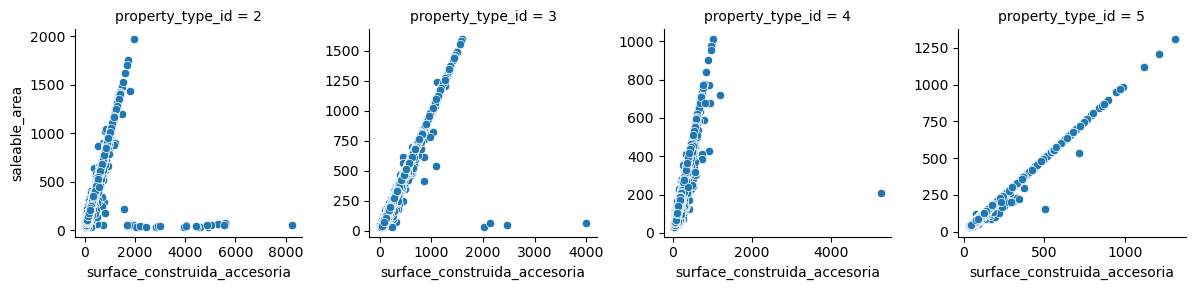

In [158]:
# see relationship between saleable_area and same_surface_construida_accesoria
g = sns.FacetGrid(
    df_properties,
    col='property_type_id',
    col_wrap=5,
    sharex=False,
    sharey=False,
    )

g.map(
    sns.scatterplot,
    'surface_construida_accesoria',
    'saleable_area',
    )


note:
- remove only properties which saleable_area is less than built_area + accessory_area !!!

---
# Sandbox

In [76]:
ts_counts

,state_id,count
valuation_date,,
2019-01,7,398
2019-02,7,457
2019-03,7,471
2019-04,7,484
2019-05,7,634
...,...,...
2023-08,9,2316
2023-09,9,2180
2023-10,9,2169


pandas.core.frame.DataFrame

In [38]:
df_properties.columns

Index(['valor_fisico_construccion', 'id_avaluo', 'fecha_avaluo', 'colonia',
       'id_clase_inmueble', 'id_tipo_inmueble', 'conservacion', 'elevador',
       'niveles', 'cve_ref_proximidad_urbana', 'cve_nivel_equipamiento_urbano',
       'valor_mercado', 'valor_concluido_total', 'nivel', 'unidades_rentables',
       'edad_anios', 'precio_m2', 'vida_util_remanente',
       'cve_clasificacion_zona', 'cve_vigilancia', 'regimen_propiedad',
       'tipo_vialidad', 'nivel_infraestructura', 'table_names-4',
       'cuenta_predial', 'id_uv', 'municipality_id', 'state_id',
       'clave_controlador', 'clave_valuador', 'id_otorgante', 'cp', 'latitude',
       'latitude', 'recamaras', 'banos', 'medio_banos', 'estacionamiento',
       'superficie_terreno', 'superficie_construida', 'superficie_accesoria',
       'superficie_vendible', 'valor_fisico_terreno_m2'],
      dtype='object')

In [39]:
df_properties.head()

,valor_fisico_construccion,id_avaluo,fecha_avaluo,colonia,id_clase_inmueble,id_tipo_inmueble,conservacion,elevador,niveles,cve_ref_proximidad_urbana,cve_nivel_equipamiento_urbano,valor_mercado,valor_concluido_total,nivel,unidades_rentables,edad_anios,precio_m2,vida_util_remanente,cve_clasificacion_zona,cve_vigilancia,regimen_propiedad,tipo_vialidad,nivel_infraestructura,table_names-4,cuenta_predial,id_uv,municipality_id,state_id,clave_controlador,clave_valuador,id_otorgante,cp,latitude,latitude,recamaras,banos,medio_banos,estacionamiento,superficie_terreno,superficie_construida,superficie_accesoria,superficie_vendible,valor_fisico_terreno_m2
0,425901.00,30001190710390500,2019-09-06,SD,2,2,4.0,0.0,1,5,1,720691,721000,3,1,0,8633,50,2,NaN,PRIVADA INDIVIDUAL,NaN,NaN,None,NaN,30001,27,7,302349,403733,30001,29160,16.665061,-92.949447,2,1,0,1,267,83,0,83,490.0
1,1035475.65,9067200711805890,2020-04-27,SD,4,2,4.0,0.0,1,5,1,1841577,1842000,3,2,15,11091,55,3,1.0,PRIVADA INDIVIDUAL,3.0,NaN,None,NaN,9067,107,7,1844523,408526,40012,30535,16.137817,-93.000447,3,1,0,3,620,166,0,166,1142.0
2,491898.00,9067200311678970,2020-01-20,SD,4,2,4.0,0.0,1,5,1,1393971,1394000,3,1,9,18703,61,3,1.0,PRIVADA INDIVIDUAL,2.0,NaN,None,NaN,9067,8,3,408047,1641235,40012,23570,23.593706,-109.588844,1,1,0,2,561,74,0,74,1278.9
3,1611371.52,090682009R0225150,2020-05-27,SD,4,2,4.0,1.0,4,1,1,4305275,4305000,3,1,25,12353,45,4,NaN,PRIVADA INDIVIDUAL,NaN,NaN,None,NaN,9068,3,9,1742315,1400027,30001,4600,19.310875,-99.158103,2,1,0,0,143,348,0,348,8918.0
4,697726.22,090832021R0653330,2020-12-08,SD,3,2,4.0,2.0,2,2,1,826000,829000,3,1,20,5954,40,3,NaN,PRIVADA INDIVIDUAL,NaN,NaN,None,NaN,9083,51,21,1844210,1639485,30001,74585,18.510228,-98.609661,4,2,1,0,93,139,0,139,1398.0
